<a href="https://colab.research.google.com/github/Iteba/Data-Science-Practice/blob/main/Insurance_Linear_Regression_Practice/Insurance_Linear_Regression_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read Data

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv('insurance.csv')

# Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Cleaning

In [81]:
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

In [82]:
dummies_sex = pd.get_dummies(df['sex'])
df = pd.concat([df, dummies_sex], axis=1)

dummies_region = pd.get_dummies(df['region'])
df = pd.concat([df, dummies_region], axis=1)

In [83]:
df.drop(['sex'], axis=1, inplace=True)
df.drop(['male'], axis=1, inplace=True)
df.drop(['region'], axis=1, inplace=True)

In [84]:
df['female'] = df['female'].map({True: 1, False: 0})
df['northeast'] = df['northeast'].map({True: 1, False: 0})
df['northwest'] = df['northwest'].map({True: 1, False: 0})
df['southeast'] = df['southeast'].map({True: 1, False: 0})
df['southwest'] = df['southwest'].map({True: 1, False: 0})

# Scaling

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
scaler = MinMaxScaler()

In [87]:
# x = scaler.fit_transform(df['charges'])
df['charges'] = scaler.fit_transform(df['charges'].values.reshape(-1,1))
df['age'] = scaler.fit_transform(df['age'].values.reshape(-1,1))
df['bmi'] = scaler.fit_transform(df['bmi'].values.reshape(-1,1))

# Data Split

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X = df.drop(['charges'], axis=1)
y = df['charges']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
model = LinearRegression()

In [96]:
model.fit(X_train, y_train)

LinearRegression()

# Evaluation

In [97]:
model.coef_

array([ 1.88685639e-01,  2.00000309e-01,  6.78832560e-03,  3.77520746e-01,
        2.96761704e-04,  7.33592739e-03,  1.41915355e-03, -3.16494219e-03,
       -5.59013875e-03])

In [98]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

In [100]:
coefficients.head()

,Coefficient
age,0.188686
bmi,0.200000
children,0.006788
smoker,0.377521
female,0.000297


## Predictions

In [101]:
predictions = model.predict(X_test)

Text(0.5, 1.0, 'Predicted Values vs. Charges')

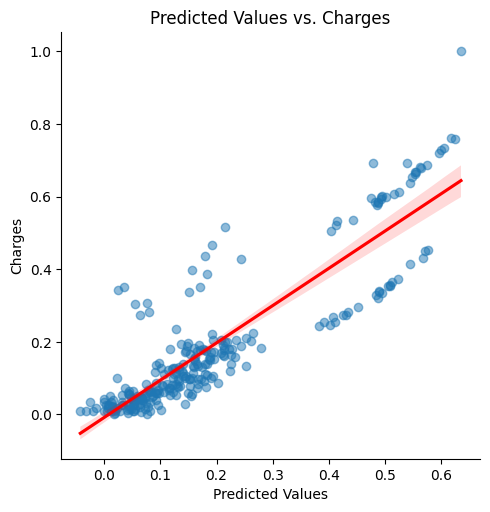

In [110]:
sns.lmplot(
    x = 'Predicted Values',
    y = 'Charges',
    data = pd.DataFrame(
        {
            'Predicted Values': predictions,
            'Charges': y_test
        }
    ),
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title('Predicted Values vs. Charges')

## Residuals

In [114]:
residuals = y_test - predictions

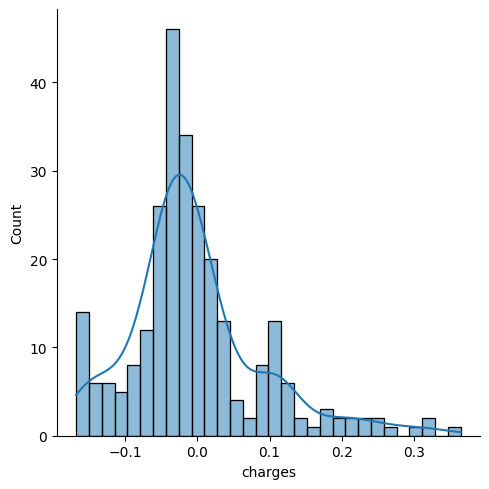

In [117]:
sns.displot(residuals, bins=30, kde=True)

## Error / Cost

In [121]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [122]:
print('Mean Absolute Error: ', mean_absolute_error(y_test, predictions))
print('Mean Squared Error: ', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error: ', root_mean_squared_error(y_test, predictions))

Mean Absolute Error:  0.06674047842209078
Mean Squared Error:  0.008560069824175858
Root Mean Squared Error:  0.09252064539428947
